# Notebook to compare McStas event data processed by Mantid and  scipp

# Introduction

This notebook shows how-to compile the McStas instrument ISIS_SANS2d_Mantid.instr with NeXus such that data can be loaded into scipp and Mantid. 

Using scipp and Mantid the TOF event data can be converted to wavelengt data and can be compared to the native McStas lambda monitor data.

## Notebook walkthrough

* Section 3 [McStas 2.7.1 CLI](#McStas-2.7.1-CLI). Make McStas data for scipp and Mantid.
* Section 4 [Mantid](#Mantid). Load McStas event data into Mantid. Convert TOF event data to lambda.
* Section 5 [Scipp load Mantid processed McStas event data](#Scipp-load-Mantid-processed-McStas-event-data). Load Mantid processed event data into scipp. Convert TOF event data to lambda.
* Section 6 [Scipp load McStas data directly](#Scipp-load-McStas-data-directly). Load event data into scipp. Compare lambda data.
* Section 7 [Conda envs](#Conda-envs). List Cond envs and packages.

# McStas 2.7.1 CLI 
[to top](#Introduction)

## Activate McStas 2.7.1 env

```bash
(base) jovyan@1708edb20485:~$ mcstas-2.7.1-environment 

The new shell started here is now set up for running this version of mcstas:

McStas version 2.7.1 (Oct. 04, 2021)
Copyright (C) DTU Physics and Risoe National Laboratory, 1997-2021
Additions (C) Institut Laue Langevin, 2003-2021
All rights reserved

To end using this version of mcstas, exit this shell.

(base) jovyan@1708edb20485:~$ 
```

## Make data folder

```bash
(base) jovyan@1708edb20485:~$ mkdir Test_for_SANS2D_Event_Data
(base) jovyan@1708edb20485:~$ cd Test_for_SANS2D_Event_Data
```

## Copy instr file

```bash
(base) jovyan@1708edb20485:~/Test_for_SANS2D_Event_Data$ cp /usr/share/mcstas/2.7.1/examples/ISIS_SANS2d_Mantid.instr .
```

## McStas compile instr file

```bash
(base) jovyan@1708edb20485:~/Test_for_SANS2D_Event_Data$ mcstas ISIS_SANS2d_Mantid.instr --trace
Info:    'ISIS_moderator' is a contributed component.
Info:    'SANS_benchmark2' is a contributed component.
Warning: Component isis_source=ISIS_moderator(string Face) definition parameter
         may be changed into a setting parameter to avoid
         warnings at compile time.
Info:    Defining SPLIT from sampleMantid=SANS_benchmark2() to END in instrument ISIS_SANS2d_Mantid
CFLAGS=
```

## Make IDF

```bash
base) jovyan@1708edb20485:~/Test_for_SANS2D_Event_Data$ mcdisplay-mantid.pl ISIS_SANS2d_Mantid.instr -n0
PGPLOT unactivated: install perl-PGPLOT first
PGPLOT unactivated: install perl-PDL first
McGUI not available: install perl-Tk first
Compiling C source 'ISIS_SANS2d_Mantid.c' ...
gcc -o ISIS_SANS2d_Mantid.out ISIS_SANS2d_Mantid.c -lm
mccode-r.c: In function ‘mcdetector_import’:
mccode-r.c:770:51: warning: ‘%s’ directive output may be truncated writing up to 1023 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
mccode-r.c:770:5: note: ‘snprintf’ output between 8 and 2054 bytes into a destination of size 1024
mccode-r.c:768:51: warning: ‘%s’ directive output may be truncated writing up to 1023 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
mccode-r.c:768:5: note: ‘snprintf’ output between 9 and 3078 bytes into a destination of size 1024
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp: In function ‘Open_File’:
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:472:34: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  472 |       {
      |                                  ^       
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:472:13: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  472 |       {
      |             ^                                                      
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:487:34: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  487 |           { if (GVars.warnings < 100)
      |                                  ^~~~    
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:487:13: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  487 |           { if (GVars.warnings < 100)
      |             ^~~~~~~~~~~~~~~~~~~~~~~~~                              
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:495:30: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  495 |         /* do reflection on speed for l/r/u/d sides */
      |                              ^~~~~~~~
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:495:9: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  495 |         /* do reflection on speed for l/r/u/d sides */
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~         
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:501:30: warning: ‘%s’ directive output may be truncated writing 4 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
  501 |         /* handle chamfers */
      |                              ^                                      
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:501:9: note: ‘snprintf’ output 7 or more bytes (assuming 1030) into a destination of size 1024
  501 |         /* handle chamfers */
      |         ^~~~~~~~~~~~~~~~~~~~~                                                            
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:507:30: warning: ‘%s’ directive output may be truncated writing 7 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
  507 |         { x += w_adj; y += h_adj; ABSORB; }
      |                              ^~~~~~~~~~~~                              
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:507:9: note: ‘snprintf’ output 10 or more bytes (assuming 1033) into a destination of size 1024
  507 |         { x += w_adj; y += h_adj; ABSORB; }
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                                                 
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp: In function ‘off_display’:
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: warning: ‘%g’ directive writing between 1 and 13 bytes into a region of size between 0 and 1023 [-Wformat-overflow=]
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:7: note: ‘sprintf’ output between 7 and 1066 bytes into a destination of size 1024
Outputting to file ISIS_SANS2d_Mantid.instr.xml
Starting simulation 'ISIS_SANS2d_Mantid.out --trace --no-output-files -n0' ...
Instrument parameters for ISIS_SANS2d_Mantid (ISIS_SANS2d_Mantid.instr)
Set value of instrument parameter L1 (double) [default='3.926']:

Set value of instrument parameter A1w (double) [default='0.030']:

Set value of instrument parameter A1h (double) [default='0.02']:

Set value of instrument parameter S6 (double) [default='0.006']:

Set value of instrument parameter A2 (double) [default='0.006']:

Set value of instrument parameter Lmin (double) [default='1']:

Set value of instrument parameter Lmax (double) [default='14']:

Set value of instrument parameter model_nr (double) [default='15.0']:


Instrument 'ISIS_SANS2d_Mantid' (ISIS_SANS2d_Mantid.instr)
Component                             a1 AT (0,0,0)    0 m from origin
Component                         Origin AT (0,0,0)    0 m from origin
Component                    isis_source AT (0,0,1e-05)    1e-05 m from origin
Component                          lmon1 AT (0,0,3.69801)    3.69801 m from origin
**********************************************************************
****   This is ISIS_moderator.comp version 2.0 (25/8/05)          ****
****   Please check to see if your files are up-to-date           ****
Component                           psd1 AT (0,0,3.69901)    3.69901 m from origin
****   http://www.isis.rl.ac.uk/Computing/Software/MC/index.htm   ****
**********************************************************************

converting Angstroms to meV
Face == E2 
default xwidth used 0.08333 m
Component                        bender1 AT (0,0,3.70001)    3.70001 m from origin
default yheight used 0.03 m
Component                        bender2 AT (0.000777669,0,4.02501)    4.02501 m from origin
Component                        bender3 AT (0.00233533,0,4.35001)    4.35001 m from origin
Component                        bender4 AT (0.00467298,0,4.675)    4.67501 m from origin
Component                        bender5 AT (0.0077906,0,4.99998)    5.00001 m from origin
Energy == 0.417316 81.7939
Component                        bender6 AT (0.0116882,0,5.32496)    5.32501 m from origin
Component                        bender7 AT (0.0163657,0,5.64992)    5.65001 m from origin
Component                        bender8 AT (0.0218231,0,5.97488)    5.97501 m from origin
Component                        bender9 AT (0.0280604,0,6.29982)    6.30001 m from origin
Component                       bender10 AT (0.0350775,0,6.62474)    6.62501 m from origin
Component                          lmonb AT (0.0428984,0,6.95065)    6.95101 m from origin
Component                           psd2 AT (0.0429224,0,6.95165)    6.95201 m from origin
Component                       guide_in AT (0.0497477,0,7.23607)    7.23651 m from origin
Component                guide_straight1 AT (0.0499277,0,7.24357)    7.24401 m from origin
Component                guide_straight2 AT (0.0979087,0,9.24299)    9.24401 m from origin
Component                guide_straight3 AT (0.14589,0,11.2424)    11.244 m from origin
nEnergy == 77
Viewport == 0.0365 0.021 Moderator size == (0.08333 * 0.03) m^2 
Dist == 3.68 (metres) 
Viewport Solid angle == 0.000184587 str
Solid angle used == 0.00141486 str
Component                guide_straight4 AT (0.193871,0,13.2418)    13.244 m from origin
Component                           psd3 AT (0.241648,0,15.2328)    15.2355 m from origin
Component                      aperture1 AT (0.241672,0,15.2338)    15.2365 m from origin
Component                      lmonitor2 AT (0.305271,0,17.884)    17.8875 m from origin
Component                             S6 AT (0.308845,0,18.033)    18.0365 m from origin
Component                   sourceMantid AT (-0.125071,0,-0.0488352)    36.1235 m from origin
Component                      APERTURE2 AT (0.335859,0,19.1586)    55.3365 m from origin
Component                          lmon2 AT (0.342696,0,19.4436)    55.6215 m from origin
Component                           psd4 AT (0.34272,0,19.4446)    55.6225 m from origin
Component                           psd5 AT (0.347038,0,19.6245)    55.8025 m from origin
Component                   sampleMantid AT (0.347518,0,19.6445)    55.8225 m from origin
Component                       detector AT (0.441081,0,23.5434)    59.7225 m from origin
Component                    nD_Mantid_1 AT (0.441081,0,23.5434)    59.7225 m from origin
Component                      lmon_post AT (0.441081,0,23.5434)    59.7225 m from origin
[ISIS_SANS2d_Mantid] Initialize
Opening -- /usr/share/mcstas/2.7.1/contrib/ISIS_tables/TS2.e2
Warning: No neutron could reach Component[1] a1
Warning: No neutron could reach Component[2] Origin
Warning: No neutron could reach Component[3] isis_source
Warning: No neutron could reach Component[4] lmon1
Warning: No neutron could reach Component[5] psd1
Warning: No neutron could reach Component[6] bender1
Warning: No neutron could reach Component[7] bender2
Warning: No neutron could reach Component[8] bender3
Warning: No neutron could reach Component[9] bender4
Warning: No neutron could reach Component[10] bender5
Warning: No neutron could reach Component[11] bender6
Warning: No neutron could reach Component[12] bender7
Warning: No neutron could reach Component[13] bender8
Warning: No neutron could reach Component[14] bender9
Warning: No neutron could reach Component[15] bender10
Warning: No neutron could reach Component[16] lmonb
Warning: No neutron could reach Component[17] psd2
Warning: No neutron could reach Component[18] guide_in
Warning: No neutron could reach Component[19] guide_straight1
Warning: No neutron could reach Component[20] guide_straight2
Warning: No neutron could reach Component[21] guide_straight3
Warning: No neutron could reach Component[22] guide_straight4
Warning: No neutron could reach Component[23] psd3
Warning: No neutron could reach Component[24] aperture1
Warning: No neutron could reach Component[25] lmonitor2
Warning: No neutron could reach Component[26] S6
Warning: No neutron could reach Component[27] sourceMantid
Warning: No neutron could reach Component[28] APERTURE2
Warning: No neutron could reach Component[29] lmon2
Warning: No neutron could reach Component[30] psd4
Warning: No neutron could reach Component[31] psd5
Warning: No neutron could reach Component[32] sampleMantid
Warning: Number of events 0 reaching SPLIT position Component[32] sampleMantid=SANS_benchmark2()
         is probably too low. Increase Ncount.
Warning: No neutron could reach Component[33] detector
Warning: No neutron could reach Component[34] nD_Mantid_1
Warning: No neutron could reach Component[35] lmon_post

Save [ISIS_SANS2d_Mantid]
Detector: lmon1_I=0 lmon1_ERR=0 lmon1_N=0 "lmon1.dat"
Detector: psd1_I=0 psd1_ERR=0 psd1_N=0 "psd1.dat"
Detector: lmonb_I=0 lmonb_ERR=0 lmonb_N=0 "lmonB.dat"
Detector: psd2_I=0 psd2_ERR=0 psd2_N=0 "psd2.dat"
Detector: psd3_I=0 psd3_ERR=0 psd3_N=0 "psd3.dat"
Detector: lmonitor2_I=0 lmonitor2_ERR=0 lmonitor2_N=0 "lmonitor2.dat"
Detector: lmon2_I=0 lmon2_ERR=0 lmon2_N=0 "Edet0.dat"
Detector: psd4_I=0 psd4_ERR=0 psd4_N=0 "psd4.dat"
Detector: psd5_I=0 psd5_ERR=0 psd5_N=0 "psd5.dat"
Detector: detector_I=0 detector_ERR=0 detector_N=0 "PSD.dat"
Detector: lmon_post_I=0 lmon_post_ERR=0 lmon_post_N=0 "lmonitor_post.dat"

Finally [ISIS_SANS2d_Mantid: .]. Time: 450164 [h] 


DONE generating IDF file ISIS_SANS2d_Mantid.instr.xml for use with Mantid.
```

## Compile c file

```bash
(base) jovyan@1708edb20485:~/Test_for_SANS2D_Event_Data$ gcc -o ISIS_SANS2d_Mantid.out ISIS_SANS2d_Mantid.c -lm -DUSE_NEXUS -lNeXus -I/usr/include/nexus
mccode-r.c: In function ‘mcdetector_import’:
mccode-r.c:770:51: warning: ‘%s’ directive output may be truncated writing up to 1023 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
mccode-r.c:770:5: note: ‘snprintf’ output between 8 and 2054 bytes into a destination of size 1024
mccode-r.c:768:51: warning: ‘%s’ directive output may be truncated writing up to 1023 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
mccode-r.c:768:5: note: ‘snprintf’ output between 9 and 3078 bytes into a destination of size 1024
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp: In function ‘Open_File’:
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:472:34: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  472 |       {
      |                                  ^       
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:472:13: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  472 |       {
      |             ^                                                      
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:487:34: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  487 |           { if (GVars.warnings < 100)
      |                                  ^~~~    
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:487:13: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  487 |           { if (GVars.warnings < 100)
      |             ^~~~~~~~~~~~~~~~~~~~~~~~~                              
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:495:30: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  495 |         /* do reflection on speed for l/r/u/d sides */
      |                              ^~~~~~~~
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:495:9: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  495 |         /* do reflection on speed for l/r/u/d sides */
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~         
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:501:30: warning: ‘%s’ directive output may be truncated writing 4 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
  501 |         /* handle chamfers */
      |                              ^                                      
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:501:9: note: ‘snprintf’ output 7 or more bytes (assuming 1030) into a destination of size 1024
  501 |         /* handle chamfers */
      |         ^~~~~~~~~~~~~~~~~~~~~                                                            
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:507:30: warning: ‘%s’ directive output may be truncated writing 7 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
  507 |         { x += w_adj; y += h_adj; ABSORB; }
      |                              ^~~~~~~~~~~~                              
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:507:9: note: ‘snprintf’ output 10 or more bytes (assuming 1033) into a destination of size 1024
  507 |         { x += w_adj; y += h_adj; ABSORB; }
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                                                 
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp: In function ‘off_display’:
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: warning: ‘%g’ directive writing between 1 and 13 bytes into a region of size between 0 and 1023 [-Wformat-overflow=]
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:7: note: ‘sprintf’ output between 7 and 1066 bytes into a destination of size 1024
```

## Run simulation

```bash
(base) jovyan@1708edb20485:~/Test_for_SANS2D_Event_Data$ gcc -o ISIS_SANS2d_Mantid.out ISIS_SANS2d_Mantid.c -lm -DUSE_NEXUS -lNeXus -I/usr/include/nexus
mccode-r.c: In function ‘mcdetector_import’:
mccode-r.c:770:51: warning: ‘%s’ directive output may be truncated writing up to 1023 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
mccode-r.c:770:5: note: ‘snprintf’ output between 8 and 2054 bytes into a destination of size 1024
mccode-r.c:768:51: warning: ‘%s’ directive output may be truncated writing up to 1023 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
mccode-r.c:768:5: note: ‘snprintf’ output between 9 and 3078 bytes into a destination of size 1024
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp: In function ‘Open_File’:
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:472:34: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  472 |       {
      |                                  ^       
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:472:13: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  472 |       {
      |             ^                                                      
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:487:34: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  487 |           { if (GVars.warnings < 100)
      |                                  ^~~~    
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:487:13: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  487 |           { if (GVars.warnings < 100)
      |             ^~~~~~~~~~~~~~~~~~~~~~~~~                              
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:495:30: warning: ‘snprintf’ output may be truncated before the last format character [-Wformat-truncation=]
  495 |         /* do reflection on speed for l/r/u/d sides */
      |                              ^~~~~~~~
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:495:9: note: ‘snprintf’ output 2 or more bytes (assuming 1025) into a destination of size 1024
  495 |         /* do reflection on speed for l/r/u/d sides */
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~         
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:501:30: warning: ‘%s’ directive output may be truncated writing 4 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
  501 |         /* handle chamfers */
      |                              ^                                      
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:501:9: note: ‘snprintf’ output 7 or more bytes (assuming 1030) into a destination of size 1024
  501 |         /* handle chamfers */
      |         ^~~~~~~~~~~~~~~~~~~~~                                                            
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:507:30: warning: ‘%s’ directive output may be truncated writing 7 bytes into a region of size between 0 and 1023 [-Wformat-truncation=]
  507 |         { x += w_adj; y += h_adj; ABSORB; }
      |                              ^~~~~~~~~~~~                              
/usr/share/mcstas/2.7.1/optics/Guide_gravity.comp:507:9: note: ‘snprintf’ output 10 or more bytes (assuming 1033) into a destination of size 1024
  507 |         { x += w_adj; y += h_adj; ABSORB; }
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                                                 
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp: In function ‘off_display’:
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: warning: ‘%g’ directive writing between 1 and 13 bytes into a region of size between 0 and 1023 [-Wformat-overflow=]
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:26: note: assuming directive output of 12 bytes
/usr/share/mcstas/2.7.1/monitors/Monitor_nD.comp:3149:7: note: ‘sprintf’ output between 7 and 1066 bytes into a destination of size 1024
(base) jovyan@1708edb20485:~/Test_for_SANS2D_Event_Data$ time ./ISIS_SANS2d_Mantid.out --format=NeXus -d 1E6 --ncount=1E6
Instrument parameters for ISIS_SANS2d_Mantid (ISIS_SANS2d_Mantid.instr)
Set value of instrument parameter L1 (double) [default='3.926']:

Set value of instrument parameter A1w (double) [default='0.030']:

Set value of instrument parameter A1h (double) [default='0.02']:

Set value of instrument parameter S6 (double) [default='0.006']:

Set value of instrument parameter A2 (double) [default='0.006']:

Set value of instrument parameter Lmin (double) [default='1']:

Set value of instrument parameter Lmax (double) [default='14']:

Set value of instrument parameter model_nr (double) [default='15.0']:

[ISIS_SANS2d_Mantid] Initialize
**********************************************************************
****   This is ISIS_moderator.comp version 2.0 (25/8/05)          ****
****   Please check to see if your files are up-to-date           ****
****   http://www.isis.rl.ac.uk/Computing/Software/MC/index.htm   ****
**********************************************************************

converting Angstroms to meV
Face == E2 
default xwidth used 0.08333 m
default yheight used 0.03 m
Opening -- /usr/share/mcstas/2.7.1/contrib/ISIS_tables/TS2.e2
Energy == 0.417316 81.7939
nEnergy == 77

Viewport == 0.0365 0.021 Moderator size == (0.08333 * 0.03) m^2 
Dist == 3.68 (metres) 
Viewport Solid angle == 0.000184587 str
Solid angle used == 0.00141486 str
Totals:: 0.000811618 77 181 

Save [ISIS_SANS2d_Mantid]
Detector: lmon1_I=3.40574e+08 lmon1_ERR=340574 lmon1_N=1e+06 "lmon1.dat"
Detector: psd1_I=3.40574e+08 psd1_ERR=340574 psd1_N=1e+06 "psd1.dat"
Detector: lmonb_I=1.46599e+08 lmonb_ERR=216691 lmonb_N=701432 "lmonB.dat"
Detector: psd2_I=1.46599e+08 psd2_ERR=216691 psd2_N=701432 "psd2.dat"
Detector: psd3_I=1.00892e+08 psd3_ERR=180081 psd3_N=542503 "psd3.dat"
Detector: lmonitor2_I=4.97472e+07 lmonitor2_ERR=126706 lmonitor2_N=208517 "lmonitor2.dat"
Detector: lmon2_I=5.58236e+06 lmon2_ERR=42499 lmon2_N=19443 "Edet0.dat"
Detector: psd4_I=5.58236e+06 psd4_ERR=42499 psd4_N=19443 "psd4.dat"
Detector: psd5_I=5.54572e+06 psd5_ERR=42359.8 psd5_N=19282 "psd5.dat"
Detector: detector_I=6852.96 detector_ERR=62.6765 detector_N=102674 "PSD.dat"
Events:   "bank01_events_dat_list.p.x.y.n.id.t"
Detector: lmon_post_I=6852.96 lmon_post_ERR=62.6765 lmon_post_N=102674 "lmonitor_post.dat"

Finally [ISIS_SANS2d_Mantid: 1E6]. Time: 6 [s] 
Warning: 2139 events were removed in Component[33] detector=PSD_monitor()
         (negative time, miss next components, rounding errors, Nan, Inf).

real    0m9.288s
user    0m6.255s
sys     0m0.434s
```

# Mantid
[to top](#Introduction)

Now we load the McStas event data into Mantid; with the goal of comparing wavelengt vs intensity distribution for the scattered beam

## Setup Mantid
[to top](#Introduction)

In [1]:
from mantid.simpleapi import *

FrameworkManager-[Notice] Welcome to Mantid 6.2.20211217.1715
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid
CheckMantidVersion-[Notice] A new version of Mantid(6.3.0) is available for download from https://download.mantidproject.org
DownloadInstrument-[Notice] All instrument definitions up to date


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Load event data
[to top](#Introduction)

In [4]:
data_nexus = '1E6/mccode.h5'

In [5]:
# Load McStas event data 
ws = Load(data_nexus)

Load-[Notice] Load started
Load-[Notice] Load successful, Duration 1.06 seconds


## Save Nexus
[to top](#Introduction)

In [6]:
# for latter we need to use the Mantid processed McStas evnet data
SaveNexus(ws[0],'mccode_event_ws0.nxs')

SaveNexus-[Notice] SaveNexus started
SaveNexus-[Notice] SaveNexus successful, Duration 0.18 seconds


## Convert to lambda
[to top](#Introduction)

In [7]:
sample = ConvertUnits(ws[0], 'Wavelength')

ConvertUnits-[Notice] ConvertUnits started
ConvertUnits-[Notice] ConvertUnits successful, Duration 0.06 seconds


## Rebin lamba
[to top](#Introduction)

In [8]:
binning = '0,0.12142857142857143,17' # app. 140 bins
sample = Rebin(sample, binning)

Rebin-[Notice] Rebin started
Rebin-[Notice] Rebin successful, Duration 0.01 seconds


## Plot lambda
[to top](#Introduction)

In [9]:
# change back plot method
#%matplotlib inline

In [10]:
# Sum all spectra to get 1D plot
sample_sum = SumSpectra(InputWorkspace=sample, IncludeMonitors=False)
# bring back to numpy arrays and stack
data_lam = np.column_stack((sample_sum.readX(0)[:-1], sample_sum.readY(0)))

SumSpectra-[Notice] SumSpectra started
SumSpectra-[Notice] SumSpectra successful, Duration 0.02 seconds


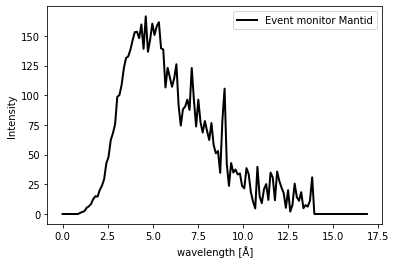

In [11]:
plt.plot(data_lam[:,0], data_lam[:,1], 'k-', lw=2,label="Event monitor Mantid")
plt.xlabel("wavelength [Å]")
plt.ylabel("Intensity")
plt.legend(loc="upper right")
plt.show()

## Compare McStas ascii data to McStas event data from Mantid
[to top](#Introduction)

In [12]:
ws[6] # Let's look at the lambda minitor after the sample 

Workspace2D
Title: lmonitor_post.dat
Histograms: 1
Bins: 140
Data points
X axis: Wavelength__AA_ / 
Y axis: Intensity
Distribution: False
Instrument: None
Run start: not available
Run end:  not available

In [13]:
# look at mcstassript ascii data
data = ws[6]

In [14]:
data.dataX(0) # lambda grid - Mantid way of getting x coord

array([ 0.06071429,  0.18214286,  0.30357143,  0.425     ,  0.54642857,
        0.66785714,  0.78928571,  0.91071429,  1.03214286,  1.15357143,
        1.275     ,  1.39642857,  1.51785714,  1.63928571,  1.76071429,
        1.88214286,  2.00357143,  2.125     ,  2.24642857,  2.36785714,
        2.48928571,  2.61071429,  2.73214286,  2.85357143,  2.975     ,
        3.09642857,  3.21785714,  3.33928571,  3.46071429,  3.58214286,
        3.70357143,  3.825     ,  3.94642857,  4.06785714,  4.18928571,
        4.31071429,  4.43214286,  4.55357143,  4.675     ,  4.79642857,
        4.91785714,  5.03928571,  5.16071429,  5.28214286,  5.40357143,
        5.525     ,  5.64642857,  5.76785714,  5.88928571,  6.01071429,
        6.13214286,  6.25357143,  6.375     ,  6.49642857,  6.61785714,
        6.73928571,  6.86071429,  6.98214286,  7.10357143,  7.225     ,
        7.34642857,  7.46785714,  7.58928571,  7.71071429,  7.83214286,
        7.95357143,  8.075     ,  8.19642857,  8.31785714,  8.43

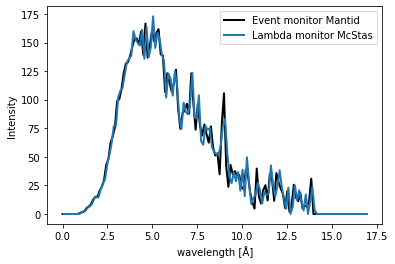

In [15]:
plt.plot(data_lam[:,0], data_lam[:,1], 'k-', lw=2, label="Event monitor Mantid")
plt.plot(data.dataX(0), data.dataY(0), lw=2, label="Lambda monitor McStas")
plt.xlabel("wavelength [Å]")
plt.ylabel("Intensity")
plt.legend(loc="upper right")
plt.show()

# Scipp load Mantid processed McStas event data
[to top](#Introduction)

* Now we will load the mantid process mcstas file  directly into scipp

* So here data goes from mcstas.h5 -> mantid -> mccode_event_ws0.nxs ->  scipp

In [16]:
import scipp as sc
import scippneutron as scn

In [17]:
file_name = 'mccode_event_ws0.nxs'

In [18]:
data_scipp = scn.load(file_name)

Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.09 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds


In [19]:
scn.instrument_view(data_scipp)

In [20]:
data_scipp_wave = scn.convert(data_scipp, 'tof', 'wavelength', scatter=True)

In [21]:
# look at scipp tof data
data_scipp

<scipp.DataArray>
Dimensions: Sizes[spectrum:40000, tof:1, ]
Coordinates:
  position                  vector3              [m]  (spectrum)  [(-0.0562757, -0.4975, 23.5553), (-0.0512772, -0.4975, 23.5552), ..., (0.933439, 0.4975, 23.5316), (0.938438, 0.4975, 23.5315)]
  sample_position           vector3              [m]  ()  [(0.347518, 0, 19.6445)]
  source_position           vector3              [m]  ()  [(-0.125071, 0, -0.0488352)]
  spectrum                    int32  [dimensionless]  (spectrum)  [1, 2, ..., 39999, 40000]
  tof                       float64            [µs]  (tof [bin-edge])  [5962.24, 83311.7]
Data:
                          DataArrayView  [dimensionless]  (spectrum, tof)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["McStas"]
  run_title                  string  [dimensionless]  ()  [""]
  sample                   PyObject  [dimensionless]  ()  [<mantid.api._api.Sample object at 0x7f5a084db890>]

In [22]:
# look at scipp wavelength data
data_scipp_wave

<scipp.DataArray>
Dimensions: Sizes[spectrum:40000, wavelength:1, ]
Coordinates:
  spectrum                    int32  [dimensionless]  (spectrum)  [1, 2, ..., 39999, 40000]
  wavelength                float64             [Å]  (spectrum, wavelength [bin-edge])  [0.996824, 13.9288, ..., 0.996824, 13.9288]
Data:
                          DataArrayView  [dimensionless]  (spectrum, wavelength)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

]
Attributes:
  L1                        float64              [m]  ()  [19.699]
  L2                        float64              [m]  (spectrum)  [3.96298, 3.96236, ..., 3.96235, 3.96297]
  Ltotal                    float64              [m]  (spectrum)  [23.662, 23.6614, ..., 23.6614, 23.662]
  incident_beam             vector3              [m]  ()  [(0.472589, 0, 19.6933)]
  instrument_name            string  [dimensionless]  ()  ["McStas"]
  position                  vector3              [m]  (spectrum)  [(-0.0562757, -0.4975, 23.5553), (-0.0512772, -0.4975, 23.5552), ..., (0.933439, 0.4975, 23.5316), (0.938438, 0.4975, 23.5315)]
  run_title                  string  [dimensionless]  ()  [""]
  sample                   PyObject  [dimensionless]  ()  [<mantid.api._api.Sample object at 0x7f5a084db890>]
  sample_position           vector3              [m]  ()  [(0.347518, 0, 19.6445)]
  scattered_beam            vector3              [m]  (spectrum)  [(-0.403794, -0.4975, 3.91084), (-0.398795, -0.4975, 3.91072), ..., (0.585921, 0.4975, 3.88708), (0.59092, 0.4975, 3.88696)]
  source_position           vector3              [m]  ()  [(-0.125071, 0, -0.0488352)]
  tof                       float64            [µs]  (wavelength [bin-edge])  [5962.24, 83311.7]

In [23]:
# we need  a lambda grid
lam_bins = sc.Variable(
        dims=['wavelength'],
        unit=sc.units.angstrom,
        values=np.linspace(0.0, 17.0, num=140))

In [24]:
# look at scipp lambda grid
lam_bins

<scipp.Variable> (wavelength: 140)    float64             [Å]  [0, 0.122302, ..., 16.8777, 17]

In [25]:
# histogram to grid
data_wave_hist = sc.histogram(data_scipp_wave, bins=lam_bins)

In [26]:
#data_wave_hist.plot() # not needed

In [27]:
data_wave_sum = sc.sum(data_wave_hist, 'spectrum')

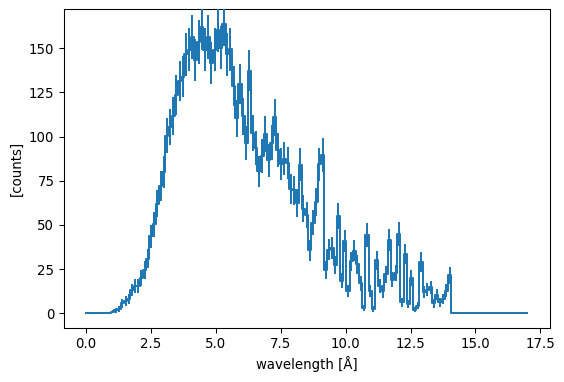

In [28]:
data_wave_sum.plot()

In [29]:
# look at data
data_wave_sum.values

array([  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.9668593,   1.7200525,
         2.571094 ,   5.5582995,   7.018061 ,   8.047136 ,  13.168299 ,
        15.577451 ,  15.605383 ,  20.158213 ,  24.462702 ,  30.926805 ,
        43.525578 ,  50.397106 ,  62.125175 ,  72.00518  ,  79.89226  ,
       100.53233  , 105.5062   , 111.62321  , 123.59436  , 131.58186  ,
       134.0239   , 146.7117   , 149.14346  , 156.42126  , 143.51535  ,
       153.49197  , 161.88641  , 149.22598  , 156.44368  , 141.60098  ,
       149.30875  , 160.38017  , 150.33191  , 163.95238  , 146.5899   ,
       149.41246  , 128.56886  , 110.51741  , 129.74188  , 111.585754 ,
        96.34144  , 137.31079  , 102.01021  ,  93.352745 ,  80.35737  ,
        89.04184  , 101.44353  ,  86.75056  ,  96.64391  , 111.03704  ,
        92.565865 ,  84.6314   ,  87.54585  ,  85.05634  ,  70.51912  ,
        69.60656  ,  62.439705 ,  84.21554  ,  59.159824 ,  55.4

In [30]:
# look at at data set
data_wave_sum

<scipp.DataArray>
Dimensions: Sizes[wavelength:139, ]
Coordinates:
  wavelength                float64             [Å]  (wavelength [bin-edge])  [0, 0.122302, ..., 16.8777, 17]
Data:
                            float32         [counts]  (wavelength)  [0, 0, ..., 0, 0]  [0, 0, ..., 0, 0]
Attributes:
  L1                        float64              [m]  ()  [19.699]
  incident_beam             vector3              [m]  ()  [(0.472589, 0, 19.6933)]
  instrument_name            string  [dimensionless]  ()  ["McStas"]
  run_title                  string  [dimensionless]  ()  [""]
  sample                   PyObject  [dimensionless]  ()  [<mantid.api._api.Sample object at 0x7f5a084db890>]
  sample_position           vector3              [m]  ()  [(0.347518, 0, 19.6445)]
  source_position           vector3              [m]  ()  [(-0.125071, 0, -0.0488352)]

In [31]:
# check lambda grid in data set
data_wave_sum.coords['wavelength'].values

array([ 0.        ,  0.12230216,  0.24460432,  0.36690647,  0.48920863,
        0.61151079,  0.73381295,  0.85611511,  0.97841727,  1.10071942,
        1.22302158,  1.34532374,  1.4676259 ,  1.58992806,  1.71223022,
        1.83453237,  1.95683453,  2.07913669,  2.20143885,  2.32374101,
        2.44604317,  2.56834532,  2.69064748,  2.81294964,  2.9352518 ,
        3.05755396,  3.17985612,  3.30215827,  3.42446043,  3.54676259,
        3.66906475,  3.79136691,  3.91366906,  4.03597122,  4.15827338,
        4.28057554,  4.4028777 ,  4.52517986,  4.64748201,  4.76978417,
        4.89208633,  5.01438849,  5.13669065,  5.25899281,  5.38129496,
        5.50359712,  5.62589928,  5.74820144,  5.8705036 ,  5.99280576,
        6.11510791,  6.23741007,  6.35971223,  6.48201439,  6.60431655,
        6.72661871,  6.84892086,  6.97122302,  7.09352518,  7.21582734,
        7.3381295 ,  7.46043165,  7.58273381,  7.70503597,  7.82733813,
        7.94964029,  8.07194245,  8.1942446 ,  8.31654676,  8.43

## Compare McStas event data
[to top](#Introduction)

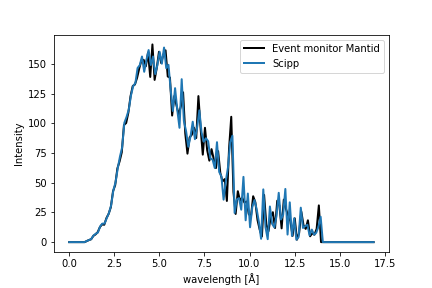

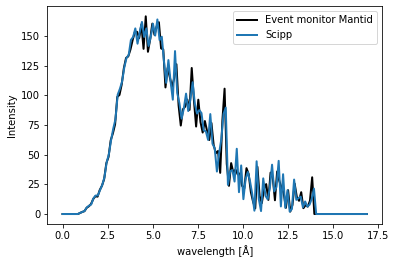

In [32]:
x2 = data_wave_sum.coords['wavelength'].values
y2 = data_wave_sum.values
plt.plot(data_lam[:,0], data_lam[:,1], 'k-', lw=2, label="Event monitor Mantid")
plt.plot(x2[:-1], y2, lw=2, label="Scipp")
plt.xlabel("wavelength [Å]")
plt.ylabel("Intensity")
plt.legend(loc="upper right")
plt.show()
# nb plot are equal
# can be made un-equal if n-points in lambda grid is changed back from 171 to 170 

# Scipp load McStas data directly
[to top](#Introduction)

* Now we will load the mccode.h5 file directly into scipp

* So here data goes from mcstas.h5 -> scipp

In [33]:
file_name_mcstas = '1E6/mccode.h5'

In [34]:
data_mcstas = scn.load(file_name_mcstas)

Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.86 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started
DeleteWorkspace-[Notice] DeleteWorkspace started (child)
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started (child)
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started (child)
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started (child)
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started (child)
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started (child)
DeleteWorkspace-[Notice] DeleteWorkspace successful, Duration 0.00 seconds
DeleteWorkspace-[Notice] DeleteWorkspace started (child)
DeleteWorkspace-[Notic

In [35]:
# list all 12 data entries in the *.h5 file
# can also be viewed with HDFviewer of Mantid GUI (both desktop applications)
data_mcstas

{'EventData': <scipp.DataArray>
 Dimensions: Sizes[spectrum:40000, tof:1, ]
 Coordinates:
   position                  vector3              [m]  (spectrum)  [(-0.0562757, -0.4975, 23.5553), (-0.0512772, -0.4975, 23.5552), ..., (0.933439, 0.4975, 23.5316), (0.938438, 0.4975, 23.5315)]
   sample_position           vector3              [m]  ()  [(0.347518, 0, 19.6445)]
   source_position           vector3              [m]  ()  [(-0.125071, 0, -0.0488352)]
   spectrum                    int32  [dimensionless]  (spectrum)  [1, 2, ..., 39999, 40000]
   tof                       float64            [µs]  (tof [bin-edge])  [5962.24, 83311.7]
 Data:
                           DataArrayView  [dimensionless]  (spectrum, tof)  [<scipp.DataArray>
 Dimensions: Sizes[event:0, ]
 Coordinates:
   pulse_time              datetime64             [ns]  (event)  []
   tof                       float64            [µs]  (event)  []
 Data:
                             float32         [counts]  (event)  []  []
 

In [36]:
data_mcstas['EventData']

<scipp.DataArray>
Dimensions: Sizes[spectrum:40000, tof:1, ]
Coordinates:
  position                  vector3              [m]  (spectrum)  [(-0.0562757, -0.4975, 23.5553), (-0.0512772, -0.4975, 23.5552), ..., (0.933439, 0.4975, 23.5316), (0.938438, 0.4975, 23.5315)]
  sample_position           vector3              [m]  ()  [(0.347518, 0, 19.6445)]
  source_position           vector3              [m]  ()  [(-0.125071, 0, -0.0488352)]
  spectrum                    int32  [dimensionless]  (spectrum)  [1, 2, ..., 39999, 40000]
  tof                       float64            [µs]  (tof [bin-edge])  [5962.24, 83311.7]
Data:
                          DataArrayView  [dimensionless]  (spectrum, tof)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  tof                       float64            [µs]  (event)  []
Data:
                            float32         [counts]  (event)  []  []

]
Attributes:
  instrument_name            string  [dimensionless]  ()  ["McStas"]
  sample                   PyObject  [dimensionless]  ()  [<mantid.api._api.Sample object at 0x7f5a081683c0>]

In [37]:
data_event_tof = data_mcstas['EventData']

In [38]:
scn.instrument_view(data_event_tof)

In [39]:
data_event_wave_mcstas = scn.convert(data_event_tof, 'tof', 'wavelength', scatter=True)

In [40]:
data_event_wave_mcstas

<scipp.DataArray>
Dimensions: Sizes[spectrum:40000, wavelength:1, ]
Coordinates:
  spectrum                    int32  [dimensionless]  (spectrum)  [1, 2, ..., 39999, 40000]
  wavelength                float64             [Å]  (spectrum, wavelength [bin-edge])  [0.996824, 13.9288, ..., 0.996824, 13.9288]
Data:
                          DataArrayView  [dimensionless]  (spectrum, wavelength)  [<scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, ..., <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

, <scipp.DataArray>
Dimensions: Sizes[event:0, ]
Coordinates:
  pulse_time              datetime64             [ns]  (event)  []
  wavelength                float64             [Å]  (event)  []
Data:
                            float32         [counts]  (event)  []  []
Attributes:
  tof                       float64            [µs]  (event)  []

]
Attributes:
  L1                        float64              [m]  ()  [19.699]
  L2                        float64              [m]  (spectrum)  [3.96298, 3.96236, ..., 3.96235, 3.96297]
  Ltotal                    float64              [m]  (spectrum)  [23.662, 23.6614, ..., 23.6614, 23.662]
  incident_beam             vector3              [m]  ()  [(0.472589, 0, 19.6933)]
  instrument_name            string  [dimensionless]  ()  ["McStas"]
  position                  vector3              [m]  (spectrum)  [(-0.0562757, -0.4975, 23.5553), (-0.0512772, -0.4975, 23.5552), ..., (0.933439, 0.4975, 23.5316), (0.938438, 0.4975, 23.5315)]
  sample                   PyObject  [dimensionless]  ()  [<mantid.api._api.Sample object at 0x7f5a081683c0>]
  sample_position           vector3              [m]  ()  [(0.347518, 0, 19.6445)]
  scattered_beam            vector3              [m]  (spectrum)  [(-0.403794, -0.4975, 3.91084), (-0.398795, -0.4975, 3.91072), ..., (0.585921, 0.4975, 3.88708), (0.59092, 0.4975, 3.88696)]
  source_position           vector3              [m]  ()  [(-0.125071, 0, -0.0488352)]
  tof                       float64            [µs]  (wavelength [bin-edge])  [5962.24, 83311.7]

In [41]:
data_wave_mcstas = sc.histogram(data_event_wave_mcstas, bins=lam_bins)

In [42]:
#data_wave_mcstas.plot() - not needed

In [43]:
data_wave_mcstas_sum = sc.sum(data_wave_mcstas, 'spectrum')

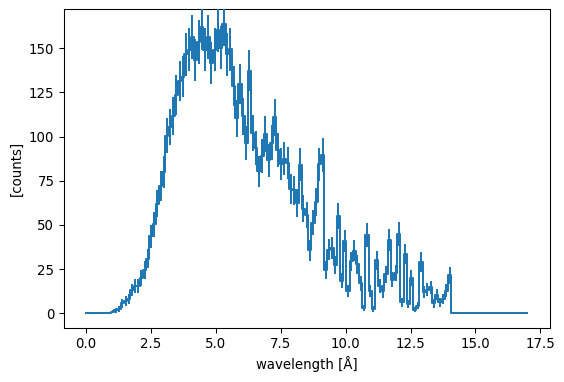

In [44]:
data_wave_mcstas_sum.plot()

## Compare Scipp, Mantid, McStas wavelength monitors

In [45]:
# find the data
data_wave_mcstas_sum.values

array([  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.9668593,   1.7200525,
         2.571094 ,   5.5582995,   7.018061 ,   8.047136 ,  13.168299 ,
        15.577451 ,  15.605383 ,  20.158213 ,  24.462702 ,  30.926805 ,
        43.525578 ,  50.397106 ,  62.125175 ,  72.00518  ,  79.89226  ,
       100.53233  , 105.5062   , 111.62321  , 123.59436  , 131.58186  ,
       134.0239   , 146.7117   , 149.14346  , 156.42126  , 143.51535  ,
       153.49197  , 161.88641  , 149.22598  , 156.44368  , 141.60098  ,
       149.30875  , 160.38017  , 150.33191  , 163.95238  , 146.5899   ,
       149.41246  , 128.56886  , 110.51741  , 129.74188  , 111.585754 ,
        96.34144  , 137.31079  , 102.01021  ,  93.352745 ,  80.35737  ,
        89.04184  , 101.44353  ,  86.75056  ,  96.64391  , 111.03704  ,
        92.565865 ,  84.6314   ,  87.54585  ,  85.05634  ,  70.51912  ,
        69.60656  ,  62.439705 ,  84.21554  ,  59.159824 ,  55.4

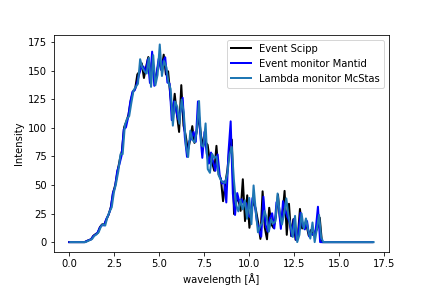

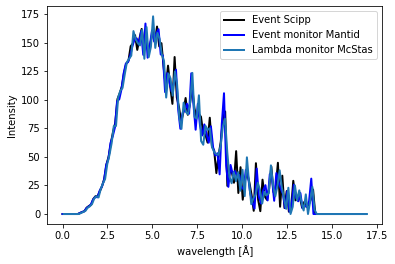

In [46]:
y3 = data_wave_mcstas_sum.values
x3 = data_wave_mcstas_sum.coords['wavelength'].values
plt.plot(x3[:-1], y3, 'k-', lw=2, label="Event Scipp") # divide by 4 - arbitray choice - just scaling 
plt.plot(data_lam[:,0], data_lam[:,1], 'b-', lw=2, label="Event monitor Mantid")
#plt.plot(data[12].xaxis, data[12].Intensity, lw=2, label="Lambda monitor McStas")
plt.plot(data.dataX(0), data.dataY(0), lw=2, label="Lambda monitor McStas")

plt.xlabel("wavelength [Å]")
plt.ylabel("Intensity")
plt.legend(loc="upper right")
plt.show()

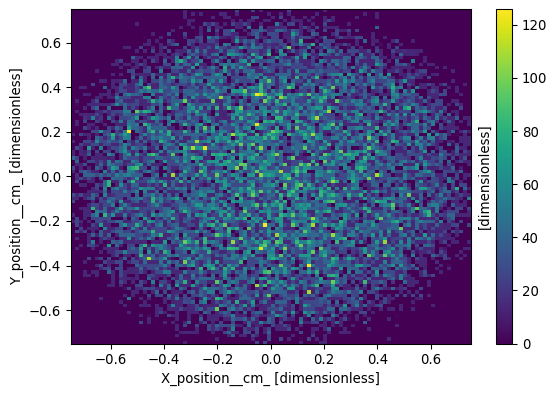

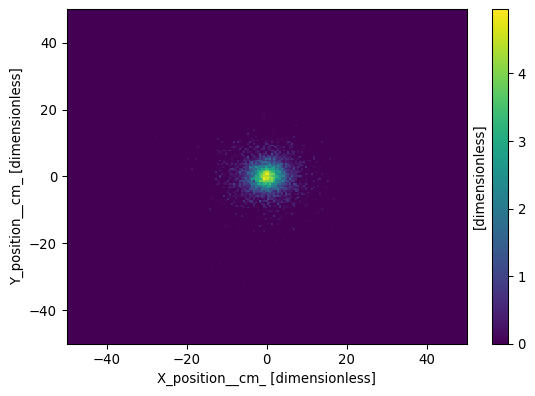

In [47]:
data_mcstas['psd5.dat'].plot()
data_mcstas['PSD.dat'].plot()

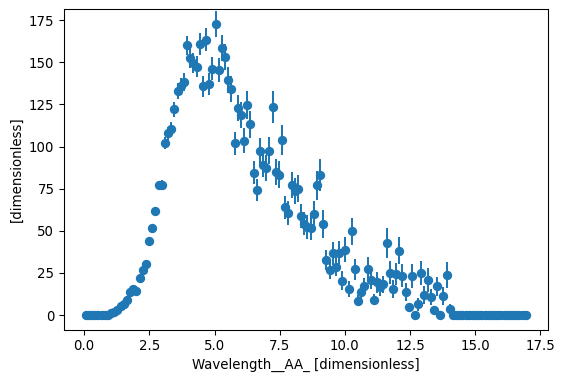

In [48]:
data_mcstas['lmonitor_post.dat'].plot()

In [49]:
data_mcstas

{'EventData': <scipp.DataArray>
 Dimensions: Sizes[spectrum:40000, tof:1, ]
 Coordinates:
   position                  vector3              [m]  (spectrum)  [(-0.0562757, -0.4975, 23.5553), (-0.0512772, -0.4975, 23.5552), ..., (0.933439, 0.4975, 23.5316), (0.938438, 0.4975, 23.5315)]
   sample_position           vector3              [m]  ()  [(0.347518, 0, 19.6445)]
   source_position           vector3              [m]  ()  [(-0.125071, 0, -0.0488352)]
   spectrum                    int32  [dimensionless]  (spectrum)  [1, 2, ..., 39999, 40000]
   tof                       float64            [µs]  (tof [bin-edge])  [5962.24, 83311.7]
 Data:
                           DataArrayView  [dimensionless]  (spectrum, tof)  [<scipp.DataArray>
 Dimensions: Sizes[event:0, ]
 Coordinates:
   pulse_time              datetime64             [ns]  (event)  []
   tof                       float64            [µs]  (event)  []
 Data:
                             float32         [counts]  (event)  []  []
 

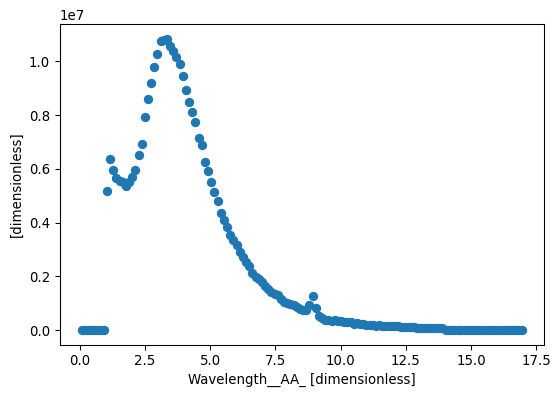

In [50]:
data_mcstas['lmon1.dat'].plot()

# Conda envs
[to top](#Introduction)

In [51]:
!conda env list

# conda environments:
#
base                  *  /opt/conda



In [52]:
!conda env export -n base

name: base
channels:
  - scipp
  - ess-dmsc
  - conda-forge
dependencies:
  - _libgcc_mutex=0.1=conda_forge
  - _openmp_mutex=4.5=1_llvm
  - aiohttp=3.8.1=py39h3811e60_0
  - aiosignal=1.2.0=pyhd8ed1ab_0
  - alembic=1.7.6=pyhd8ed1ab_0
  - anyio=3.5.0=py39hf3d152e_0
  - appdirs=1.4.4=pyh9f0ad1d_0
  - argon2-cffi=21.3.0=pyhd8ed1ab_0
  - argon2-cffi-bindings=21.2.0=py39h3811e60_1
  - asttokens=2.0.5=pyhd8ed1ab_0
  - async-timeout=4.0.2=pyhd8ed1ab_0
  - async_generator=1.10=py_0
  - attrs=21.4.0=pyhd8ed1ab_0
  - babel=2.9.1=pyh44b312d_0
  - backcall=0.2.0=pyh9f0ad1d_0
  - backports=1.0=py_2
  - backports.functools_lru_cache=1.6.4=pyhd8ed1ab_0
  - black=22.1.0=pyhd8ed1ab_0
  - bleach=4.1.0=pyhd8ed1ab_0
  - blinker=1.4=py_1
  - blis=0.8.1=h7f98852_1
  - boost=1.77.0=py39h5472131_0
  - boost-cpp=1.77.0=h359cf19_1
  - brotli=1.0.9=h7f98852_6
  - brotli-bin=1.0.9=h7f98852_6
  - brotlipy=0.7.0=py39h3811e60_1003
  - bzip2=1.0.8=h7f98852_4
  - c-ares=1.18.1=h7f98852_0
  - ca-certificates=2021.10.8=